In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_csv("MPLtrain.csv")
df_train

,date,season,neutral,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,...,pitcher2,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score
0,6/22/1994,1994,0,STL,WSN,1477.133,1539.099,0.445579,0.554421,1475.581,...,ruetk001,47.695,47.625,0.252007,-1.356784,0.446481,0.553519,1477.558,1542.252,4
1,4/19/1927,1927,0,MIN,OAK,1527.281,1528.212,0.533150,0.466850,1525.293,...,ehmkh101,48.558,55.427,-0.235047,0.334327,0.529214,0.470786,1524.106,1531.450,1
2,5/7/1925,1925,0,BAL,DET,1475.489,1511.420,0.482837,0.517163,1476.912,...,white102,48.801,48.448,-0.010332,-0.072218,0.477767,0.522233,1475.288,1511.956,6
3,8/6/1911,1911,0,STL,ATL,1503.699,1383.671,0.696163,0.303837,1499.664,...,browb102,47.400,45.297,NaN,NaN,0.700255,0.299745,1500.029,1384.267,1
4,5/6/2000,2000,0,TOR,CLE,1506.707,1527.706,0.504319,0.495681,1505.018,...,wrigj002,50.836,50.042,-0.208619,-0.345692,0.508434,0.491566,1507.290,1528.973,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176035,1885-07-13,1885,0,DTN,SLU,1438.405,1443.996,0.526468,0.473532,1440.516,...,baldl101,NaN,NaN,NaN,NaN,0.526611,0.473389,1440.568,1441.877,9
176036,9/11/1909,1909,0,PIT,CIN,1603.298,1512.738,0.659139,0.340861,1604.195,...,maddn101,NaN,NaN,NaN,NaN,0.659078,0.340922,1604.160,1511.852,2
176037,7/17/1908,1908,0,CHC,SFG,1546.730,1548.109,0.532508,0.467492,1548.128,...,browm102,NaN,NaN,NaN,NaN,0.532544,0.467456,1548.164,1546.723,1
176038,9/14/1988,1988,0,CIN,HOU,1524.637,1512.151,0.552315,0.447685,1520.876,...,ryann001,59.968,54.128,-0.392851,-1.538962,0.554647,0.445353,1518.531,1512.707,1


In [3]:
df_train.columns.tolist()

['date',
 'season',
 'neutral',
 'team1',
 'team2',
 'elo1_pre',
 'elo2_pre',
 'elo_prob1',
 'elo_prob2',
 'elo1_post',
 'elo2_post',
 'rating1_pre',
 'rating2_pre',
 'pitcher1',
 'pitcher2',
 'pitcher1_rgs',
 'pitcher2_rgs',
 'pitcher1_adj',
 'pitcher2_adj',
 'rating_prob1',
 'rating_prob2',
 'rating1_post',
 'rating2_post',
 'score']

In [4]:
df_test=pd.read_csv("MPLtest.csv")
df_test

,date,season,neutral,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,...,pitcher1,pitcher2,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post
0,8/7/1952,1952,0,CIN,STL,1467.967,1541.990,0.428504,0.571496,1466.074,...,perkh101,brech101,48.207,51.838,-0.392851,0.252007,0.424383,0.575617,1465.466,1548.032
1,6/20/2001,2001,0,CHW,KCR,1502.209,1472.199,0.577107,0.422893,1503.308,...,biddr001,wilsk001,47.049,48.090,0.203916,-0.247801,0.572962,0.427038,1504.573,1475.149
2,9/19/1965,1965,0,STL,LAD,1511.081,1528.223,0.509868,0.490132,1507.982,...,gibsb101,ostec103,57.805,50.792,0.252007,-0.351777,0.517462,0.482538,1510.050,1529.263
3,5/1/1986,1986,0,ATL,NYM,1463.834,1561.337,0.395771,0.604229,1467.595,...,smitz001,aguir001,52.251,48.540,-0.301919,-0.458553,0.400237,0.599763,1467.175,1554.835
4,9/1/1992,1992,0,NYM,ATL,1489.622,1552.736,0.443947,0.556053,1487.586,...,whitw001,niedd001,47.088,47.400,-0.458553,-0.301919,0.436033,0.563967,1483.709,1556.621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37051,9/19/1948,1948,0,CLE,OAK,1569.886,1516.126,0.610074,0.389926,1571.162,...,groms101,fowld101,51.246,49.916,-0.345692,0.334327,0.610160,0.389840,1573.454,1516.836
37052,4/8/2000,2000,0,SEA,NYY,1500.833,1562.049,0.446646,0.553354,1499.652,...,mechg001,herno001,49.449,59.339,0.781212,-0.205812,0.448482,0.551518,1499.432,1561.352
37053,6/29/1992,1992,0,LAD,SDP,1506.380,1514.071,0.523453,0.476547,1507.869,...,candt001,eilad001,53.642,43.376,-0.351777,0.073252,0.525637,0.474363,1507.347,1512.517
37054,5/2/1951,1951,0,CHW,NYY,1480.088,1569.071,0.407557,0.592443,1478.686,...,littd102,sheas101,46.311,51.971,0.203916,-0.205812,0.405588,0.594412,1479.562,1572.611


In [5]:
df_test.columns.tolist()

['date',
 'season',
 'neutral',
 'team1',
 'team2',
 'elo1_pre',
 'elo2_pre',
 'elo_prob1',
 'elo_prob2',
 'elo1_post',
 'elo2_post',
 'rating1_pre',
 'rating2_pre',
 'pitcher1',
 'pitcher2',
 'pitcher1_rgs',
 'pitcher2_rgs',
 'pitcher1_adj',
 'pitcher2_adj',
 'rating_prob1',
 'rating_prob2',
 'rating1_post',
 'rating2_post']

In [6]:
df_train.shape

(176040, 24)

In [7]:
df_test.shape

(37056, 23)

In [8]:
df_train.describe()

,season,neutral,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,rating1_pre,rating2_pre,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score
count,176040.000000,176040.000000,176040.000000,176040.000000,176040.000000,176040.000000,176040.000000,176040.000000,176040.000000,176040.000000,149150.000000,149150.000000,148601.000000,148601.000000,176040.000000,176040.000000,176040.000000,176040.000000,176040.000000
mean,1962.222347,0.000153,1503.812569,1503.433018,0.534251,0.465749,1503.786940,1503.458648,1503.811866,1503.435349,50.341110,50.323768,0.333503,0.381686,0.534850,0.465150,1503.782671,1503.464543,4.648529
std,40.001724,0.012384,37.933547,38.114510,0.077488,0.077488,38.022984,38.218555,38.181808,38.363922,4.185029,4.184392,7.329568,7.271983,0.078943,0.078943,38.269437,38.468247,3.283705
min,1871.000000,0.000000,1347.367000,1336.761000,0.206134,0.177449,1346.220000,1334.931000,1347.527000,1336.836000,35.440444,36.464637,-60.749042,-66.755793,0.203695,0.177482,1346.381000,1335.004000,0.000000
25%,1929.000000,0.000000,1479.023000,1478.758500,0.483013,0.413178,1478.878750,1478.701750,1479.007750,1478.717750,47.400000,47.400000,-0.351777,-0.351777,0.482464,0.411619,1478.895750,1478.706750,2.000000
50%,1970.000000,0.000000,1505.720500,1505.327000,0.535147,0.464853,1505.680000,1505.384500,1505.802500,1505.435500,49.758000,49.734666,-0.072218,-0.072218,0.535867,0.464133,1505.781000,1505.489500,4.000000
75%,1997.000000,0.000000,1529.681250,1529.311500,0.586822,0.516987,1529.754000,1529.404000,1529.608250,1529.299000,52.808750,52.813000,0.203916,0.203916,0.588381,0.517536,1529.627250,1529.405250,6.000000
max,2020.000000,1.000000,1656.119000,1657.618000,0.822551,0.793866,1656.798000,1657.986000,1657.500000,1658.985000,77.481000,78.047000,76.298680,79.396249,0.822518,0.796305,1658.171000,1659.344000,37.000000


In [9]:
df_train.isnull().sum()

date                0
season              0
neutral             0
team1               0
team2               0
elo1_pre            0
elo2_pre            0
elo_prob1           0
elo_prob2           0
elo1_post           0
elo2_post           0
rating1_pre         0
rating2_pre         0
pitcher1           31
pitcher2           31
pitcher1_rgs    26890
pitcher2_rgs    26890
pitcher1_adj    27439
pitcher2_adj    27439
rating_prob1        0
rating_prob2        0
rating1_post        0
rating2_post        0
score               0
dtype: int64

In [10]:
df_train.pitcher1_rgs = df_train.pitcher1_rgs.fillna(df_train.pitcher1_rgs.mean())

In [11]:
df_train.pitcher2_rgs = df_train.pitcher2_rgs.fillna(df_train.pitcher2_rgs.mean())

In [12]:
df_train.pitcher1_adj = df_train.pitcher1_adj.fillna(df_train.pitcher1_adj.mean())

In [13]:
df_train.pitcher2_adj = df_train.pitcher2_adj.fillna(df_train.pitcher2_adj.mean())

In [14]:
df_train.isnull().sum()

date             0
season           0
neutral          0
team1            0
team2            0
elo1_pre         0
elo2_pre         0
elo_prob1        0
elo_prob2        0
elo1_post        0
elo2_post        0
rating1_pre      0
rating2_pre      0
pitcher1        31
pitcher2        31
pitcher1_rgs     0
pitcher2_rgs     0
pitcher1_adj     0
pitcher2_adj     0
rating_prob1     0
rating_prob2     0
rating1_post     0
rating2_post     0
score            0
dtype: int64

In [15]:
df_test.isnull().sum()

date            0
season          0
neutral         0
team1           0
team2           0
elo1_pre        0
elo2_pre        0
elo_prob1       0
elo_prob2       0
elo1_post       0
elo2_post       0
rating1_pre     0
rating2_pre     0
pitcher1        0
pitcher2        0
pitcher1_rgs    0
pitcher2_rgs    0
pitcher1_adj    0
pitcher2_adj    0
rating_prob1    0
rating_prob2    0
rating1_post    0
rating2_post    0
dtype: int64

In [16]:
df_train.neutral.nunique()

2

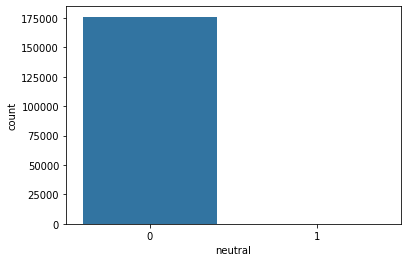

In [17]:
sns.countplot(x=df_train['neutral'],data=df_train)

In [18]:
df_train.team1.nunique() #home team

89

In [19]:
df_train.team2.nunique()  # awayteam

89

In [20]:
df_train.elo1_pre.nunique()

106763

In [21]:
df_train.pitcher1.nunique()

5762

In [22]:
df_train.dtypes

date             object
season            int64
neutral           int64
team1            object
team2            object
elo1_pre        float64
elo2_pre        float64
elo_prob1       float64
elo_prob2       float64
elo1_post       float64
elo2_post       float64
rating1_pre     float64
rating2_pre     float64
pitcher1         object
pitcher2         object
pitcher1_rgs    float64
pitcher2_rgs    float64
pitcher1_adj    float64
pitcher2_adj    float64
rating_prob1    float64
rating_prob2    float64
rating1_post    float64
rating2_post    float64
score             int64
dtype: object

In [23]:
df_train.score.unique()

array([ 4,  1,  6,  2,  3,  7, 10,  5,  0,  8, 11,  9, 12, 15, 13, 14, 18,
       19, 17, 20, 16, 21, 24, 28, 25, 22, 23, 29, 26, 32, 35, 30, 27, 31,
       37], dtype=int64)

In [24]:
df_train.corr()

,season,neutral,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,rating1_pre,rating2_pre,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score
season,1.000000,0.016685,0.035223,0.046401,-0.003756,0.003756,0.033362,0.048044,0.034814,0.045738,-0.007042,-0.001108,0.051273,0.057151,-0.004186,0.004186,0.032985,0.047354,-0.074198
neutral,0.016685,1.000000,-0.001772,0.008172,-0.012327,0.012327,-0.002038,0.008418,-0.001971,0.008650,-0.004284,0.005012,-0.001116,0.005370,-0.013308,0.013308,-0.002172,0.008832,-0.003005
elo1_pre,0.035223,-0.001772,1.000000,-0.064086,0.729988,-0.729988,0.997985,-0.064247,0.997111,-0.064542,0.311939,-0.004049,0.004821,0.009821,0.718172,-0.718172,0.995183,-0.064720,0.079224
elo2_pre,0.046401,0.008172,-0.064086,1.000000,-0.727994,0.727994,-0.064667,0.998006,-0.064795,0.997134,0.004294,0.309910,0.015334,0.005335,-0.715697,0.715697,-0.065432,0.995211,-0.107638
elo_prob1,-0.003756,-0.012327,0.729988,-0.727994,1.000000,-1.000000,0.728997,-0.726735,0.728455,-0.726309,0.212826,-0.215137,-0.006377,0.003921,0.983458,-0.983458,0.727562,-0.725111,0.127103
elo_prob2,0.003756,0.012327,-0.729988,0.727994,-1.000000,1.000000,-0.728997,0.726735,-0.728455,0.726309,-0.212826,0.215137,0.006377,-0.003921,-0.983458,0.983458,-0.727562,0.725111,-0.127103
elo1_post,0.033362,-0.002038,0.997985,-0.064667,0.728997,-0.728997,1.000000,-0.068831,0.995108,-0.065141,0.314147,-0.007307,0.006056,0.008383,0.717548,-0.717548,0.997141,-0.069253,0.117424
elo2_post,0.048044,0.008418,-0.064247,0.998006,-0.726735,0.726735,-0.068831,1.000000,-0.064959,0.995166,0.001356,0.312316,0.014052,0.006729,-0.714809,0.714809,-0.069531,0.997163,-0.145535
rating1_pre,0.034814,-0.001971,0.997111,-0.064795,0.728455,-0.728455,0.995108,-0.064959,1.000000,-0.065528,0.307729,-0.004354,0.001902,0.009805,0.720387,-0.720387,0.998039,-0.065678,0.078897
rating2_pre,0.045738,0.008650,-0.064542,0.997134,-0.726309,0.726309,-0.065141,0.995166,-0.065528,1.000000,0.004184,0.305663,0.016007,0.001853,-0.717604,0.717604,-0.066154,0.998060,-0.107341


In [25]:
df_train.columns

Index(['date', 'season', 'neutral', 'team1', 'team2', 'elo1_pre', 'elo2_pre',
       'elo_prob1', 'elo_prob2', 'elo1_post', 'elo2_post', 'rating1_pre',
       'rating2_pre', 'pitcher1', 'pitcher2', 'pitcher1_rgs', 'pitcher2_rgs',
       'pitcher1_adj', 'pitcher2_adj', 'rating_prob1', 'rating_prob2',
       'rating1_post', 'rating2_post', 'score'],
      dtype='object')

In [26]:
df_train.drop(columns=['date','team1','team2','elo1_pre','elo2_pre','pitcher1','pitcher2'],axis=1,inplace=True)

In [27]:
df_test.drop(columns=['date','team1','team2','elo1_pre','elo2_pre','pitcher1','pitcher2'],axis=1,inplace=True)

In [28]:
df_train.shape

(176040, 17)

In [29]:
df_test.shape

(37056, 16)

In [30]:
df_train.dtypes

season            int64
neutral           int64
elo_prob1       float64
elo_prob2       float64
elo1_post       float64
elo2_post       float64
rating1_pre     float64
rating2_pre     float64
pitcher1_rgs    float64
pitcher2_rgs    float64
pitcher1_adj    float64
pitcher2_adj    float64
rating_prob1    float64
rating_prob2    float64
rating1_post    float64
rating2_post    float64
score             int64
dtype: object

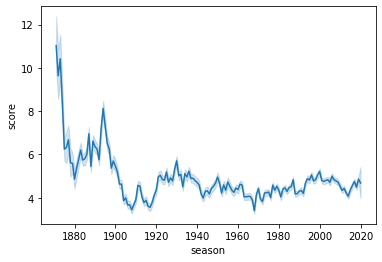

In [31]:
sns.lineplot(x=df_train.season,y=df_train.score,data=df_train)

In [32]:
df_train.skew()

season          -0.423830
neutral         80.728627
elo_prob1       -0.063691
elo_prob2        0.063691
elo1_post       -0.184368
elo2_post       -0.203931
rating1_pre     -0.186912
rating2_pre     -0.203470
pitcher1_rgs     0.784095
pitcher2_rgs     0.778033
pitcher1_adj     1.917317
pitcher2_adj     2.027625
rating_prob1    -0.064804
rating_prob2     0.064804
rating1_post    -0.186148
rating2_post    -0.205105
score            1.177424
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1c75f30dc48>,
 'caps': [<matplotlib.lines.Line2D at 0x1c75f31bc08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c75f30d208>],
 'medians': [<matplotlib.lines.Line2D at 0x1c75f30ab88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c75f30ac88>],
 'means': []}

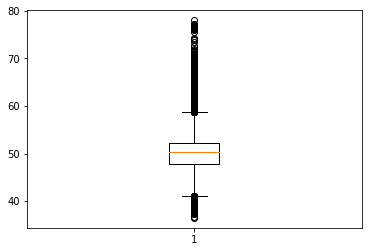

In [33]:
plt.boxplot(df_train['pitcher2_rgs'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c75f71a708>,
 'caps': [<matplotlib.lines.Line2D at 0x1c75f71afc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c75f708c48>],
 'medians': [<matplotlib.lines.Line2D at 0x1c75f704f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c75f714dc8>],
 'means': []}

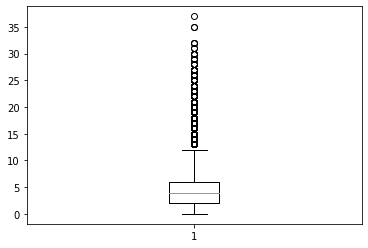

In [34]:
plt.boxplot(df_train['score'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

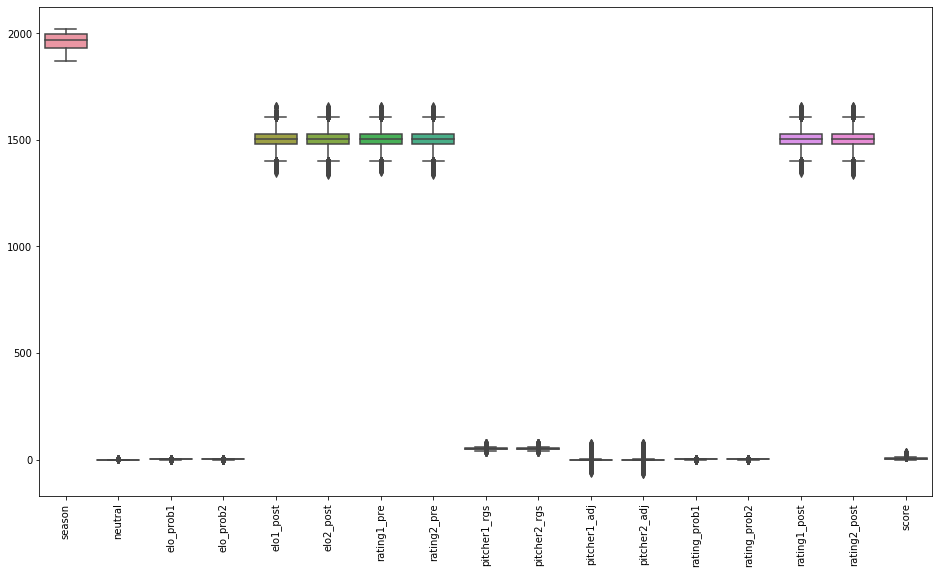

In [35]:
plt.figure(figsize=(16,9))
sns.boxplot(data=df_train)
plt.xticks(rotation=90)

In [36]:
X=df_train.drop('score',axis=1)
y=df_train['score']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=80)

In [39]:
X_train

,season,neutral,elo_prob1,elo_prob2,elo1_post,elo2_post,rating1_pre,rating2_pre,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post
74,2018,0,0.499845,0.500155,1521.107737,1541.53545,1532.41595,1547.520974,52.764141,52.386682,-7.383500,3.931041,0.496518,0.503482,1534.271259,1545.665665
126185,2012,0,0.459920,0.540080,1490.588000,1545.83700,1496.25200,1542.954000,49.942000,49.936000,1.945800,0.183300,0.469902,0.530098,1494.536000,1544.670000
16411,1971,0,0.432578,0.567422,1444.537000,1518.21400,1442.16600,1519.025000,46.544000,42.761000,0.203916,0.334327,0.427610,0.572390,1440.742000,1520.450000
110504,1948,0,0.507136,0.492864,1515.003000,1541.93600,1517.24300,1537.797000,50.663000,47.924000,0.271111,-0.301919,0.507944,0.492056,1512.984000,1542.057000
39304,1932,0,0.547377,0.452623,1523.217000,1510.29500,1520.93500,1517.161000,60.565000,50.559000,0.271111,0.252007,0.545591,0.454409,1522.492000,1515.605000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139786,1897,0,0.699721,0.300279,1500.025000,1374.40700,1498.58900,1375.769000,50.341110,50.323768,0.333503,0.381686,0.699552,0.300448,1499.919000,1374.440000
100563,1990,0,0.537838,0.462162,1500.995000,1501.64100,1499.25300,1501.672000,49.909000,47.016000,-0.247801,0.203916,0.531019,0.468981,1497.757000,1503.168000
19366,1878,0,0.592580,0.407420,1453.442000,1419.35600,1456.96800,1415.833000,50.341110,50.323768,0.333503,0.381686,0.592654,0.407346,1453.470000,1419.331000
38076,1901,0,0.500751,0.499249,1483.124000,1500.97800,1480.26700,1503.828000,50.341110,50.323768,0.333503,0.381686,0.506834,0.493166,1483.060000,1501.036000


In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [43]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)
pred

array([1.61157801, 6.22150216, 6.51625441, ..., 5.5605967 , 1.38493233,
       6.16830089])

In [44]:
from sklearn.metrics import r2_score
score=r2_score(model.predict(X_test),y_test)
score

-0.7791744458920069

In [45]:
from sklearn.model_selection import GridSearchCV
#dt=DecisionTreeRegressor()
#parameters={'criterion':('mse','mae','friedman_mse')}
#gd=GridSearchCV(dt,parameters)
#gd.fit(X_train,y_train)
#gd.best_params_

In [46]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(X,y)
clf.best_params_

{'alpha': 0.001}

In [48]:
lsreg.fit(X_train,y_train)
lsreg.score(X_train,y_train)
pred=lsreg.predict(X_test)
print(pred)
    #rscore=r2_score(k.predict(X_test),y_test)
    #print("r2 score is",rscore)
    #score.append(rscore)

[4.65282241 4.65282241 4.65282241 ... 4.65282241 4.65282241 4.65282241]


In [49]:
score=r2_score(lsreg.predict(X_test),y_test)
score

-1.5053093937494525e+30

In [50]:
from sklearn.externals import joblib 
  

joblib.dump(model,'mpl.pkl') 
  
model_from_joblib = joblib.load('mpl.pkl') 

In [51]:
a= model_from_joblib.predict(df_test)

In [52]:
a

array([12681.5182242 , 12745.98999321, 12830.73693977, ...,
       12867.07591848, 12836.00900634, 12666.29081112])